**Importing Models**

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("iris.csv")

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Getting to Know the Data**

In [17]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**EDA**

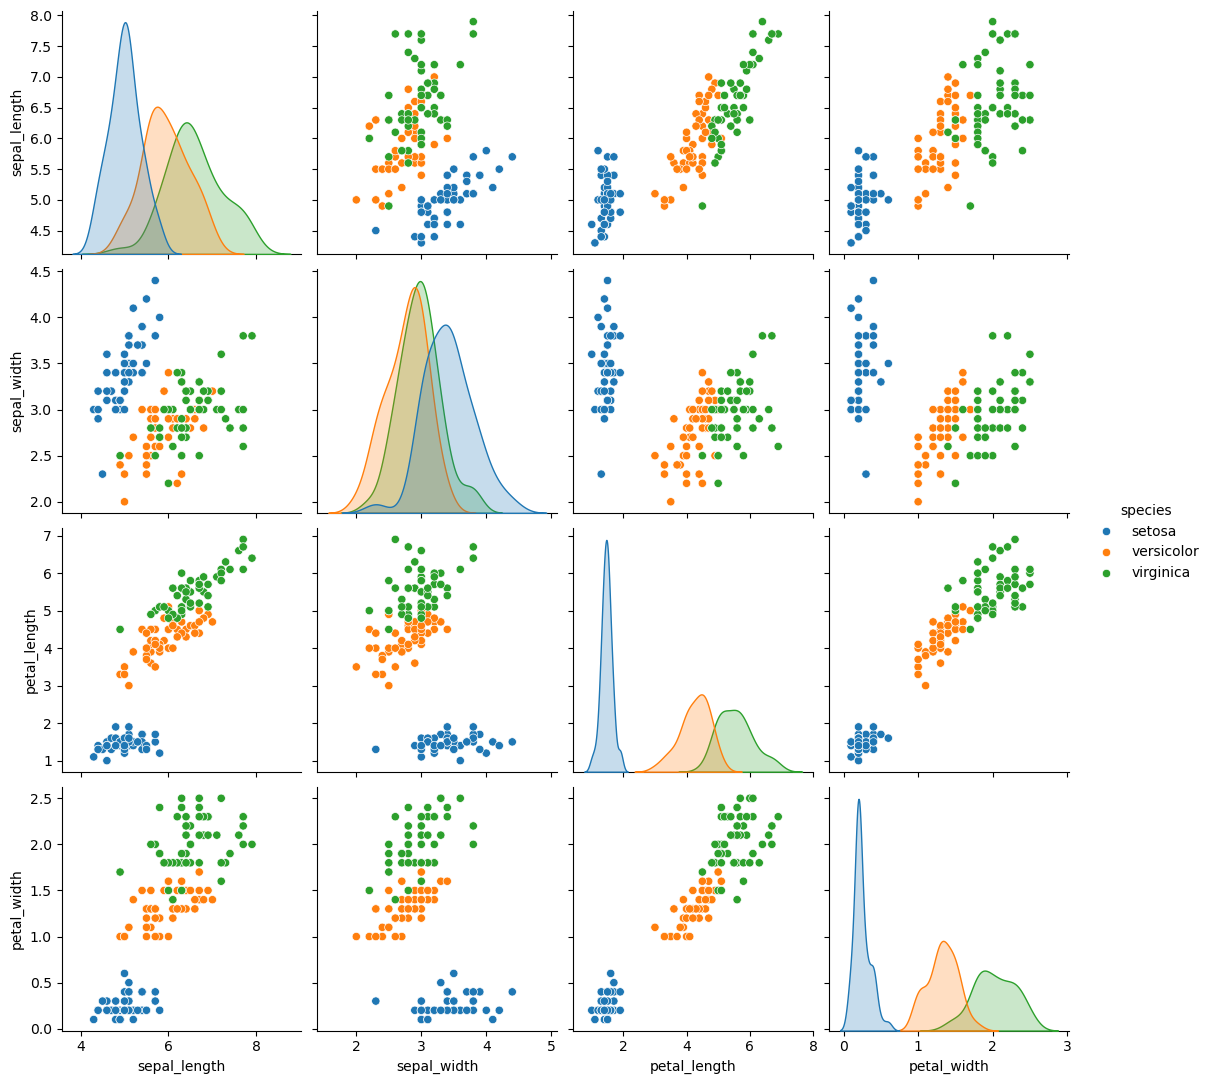

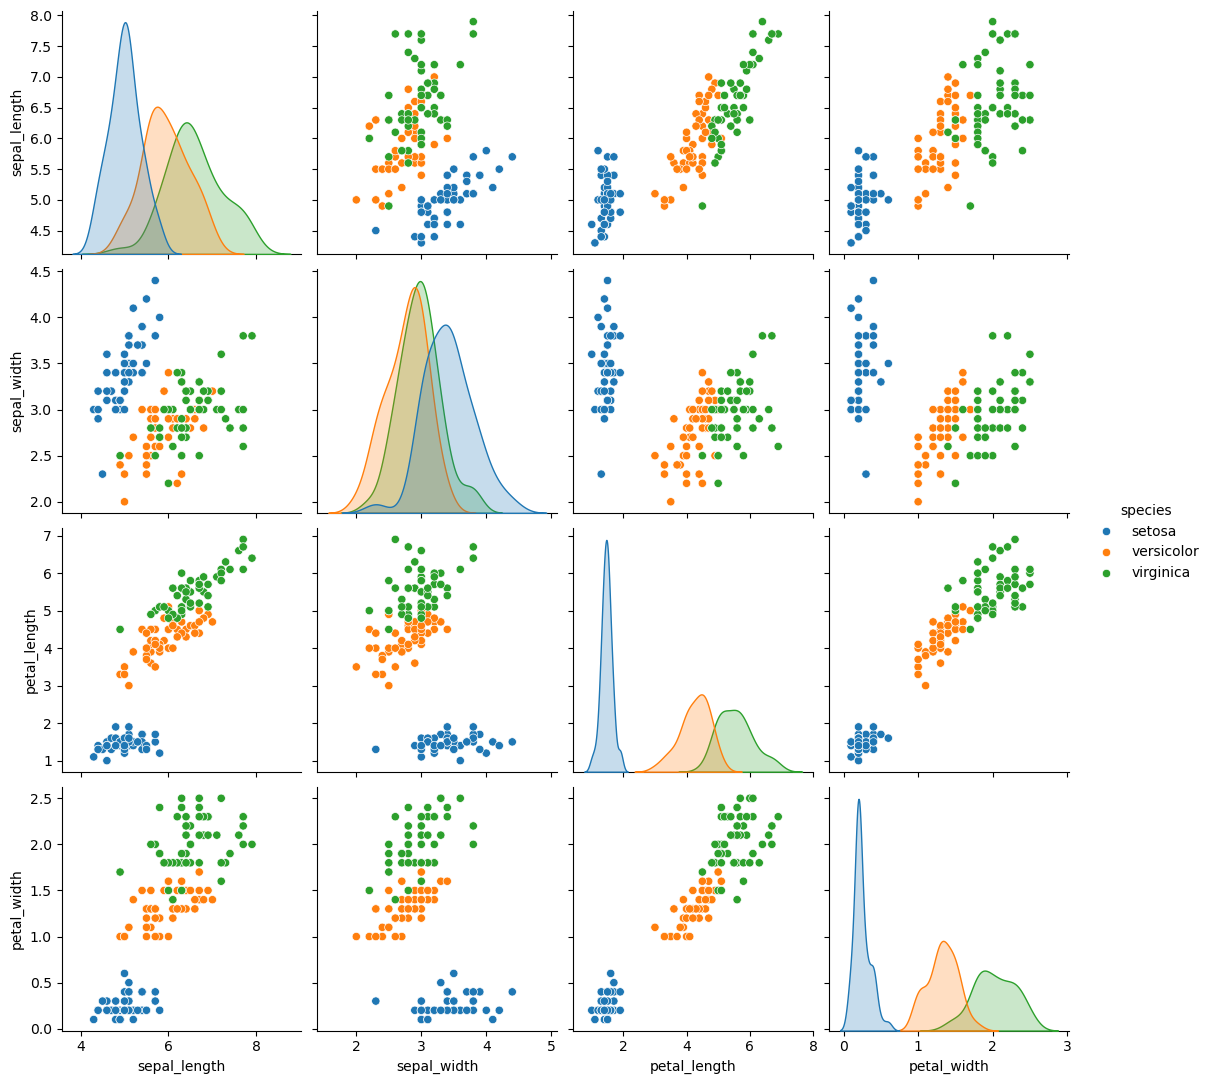

In [25]:
sns.pairplot(df, hue="species", height = 2.75)
plt.show()

In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
df['species_num'] = df['species']

In [33]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [39]:
df['species_num'] = df['species_num'].str.replace('setosa', '1')
df['species_num'] = df['species_num'].str.replace('versicolor', '2')
df['species_num'] = df['species_num'].str.replace('virginica', '3')

In [41]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_num   150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


In [47]:
#change the data type of species_num to int
df["species_num"] = pd.to_numeric(df["species_num"], downcast = "integer")

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_num   150 non-null    int8   
dtypes: float64(4), int8(1), object(1)
memory usage: 6.1+ KB


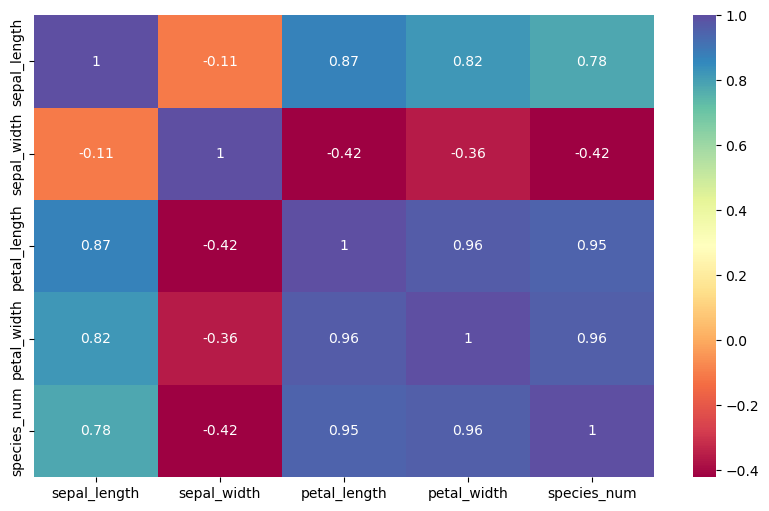

In [61]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap="Spectral", annot=True)
plt.show()

In [63]:
df.drop(["petal_length", "species_num"], axis = 1, inplace = True)

In [65]:
df.head()

,sepal_length,sepal_width,petal_width,species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


**Decision Tree Modelling**

In [70]:
X = df.drop(["species"], axis = 1)
y = df["species"]

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt = DecisionTreeClassifier()

In [78]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [82]:
y_pred = dt.predict(X_test)

In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [86]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.9736842105263158


In [88]:
from sklearn.model_selection import cross_val_score

cross_check = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10)
cross_check.mean()

0.8734848484848483

In [90]:
cross_check

array([0.91666667, 1.        , 1.        , 1.        , 0.63636364,
       0.81818182, 0.90909091, 0.81818182, 0.90909091, 0.72727273])

In [92]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


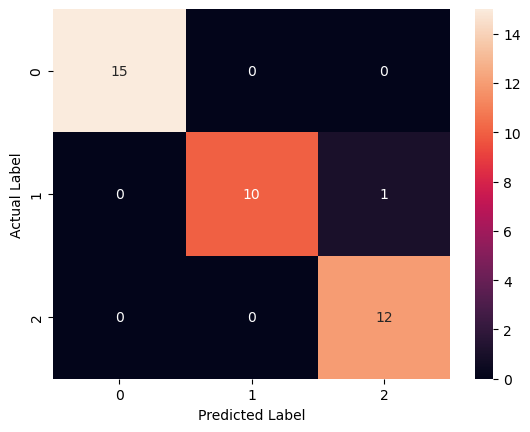

In [98]:
con_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix, annot = True)
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

In [100]:
print("classification_report: ",classification_report(y_test, y_pred))

classification_report:                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [102]:
from sklearn import tree

In [104]:
list(df.columns[:-1])

['sepal_length', 'sepal_width', 'petal_width']

In [106]:
features = list(df.columns[:-1])
targets = ["setosa", "versicolor", "virginica"]
print(features)
print(targets)

['sepal_length', 'sepal_width', 'petal_width']
['setosa', 'versicolor', 'virginica']


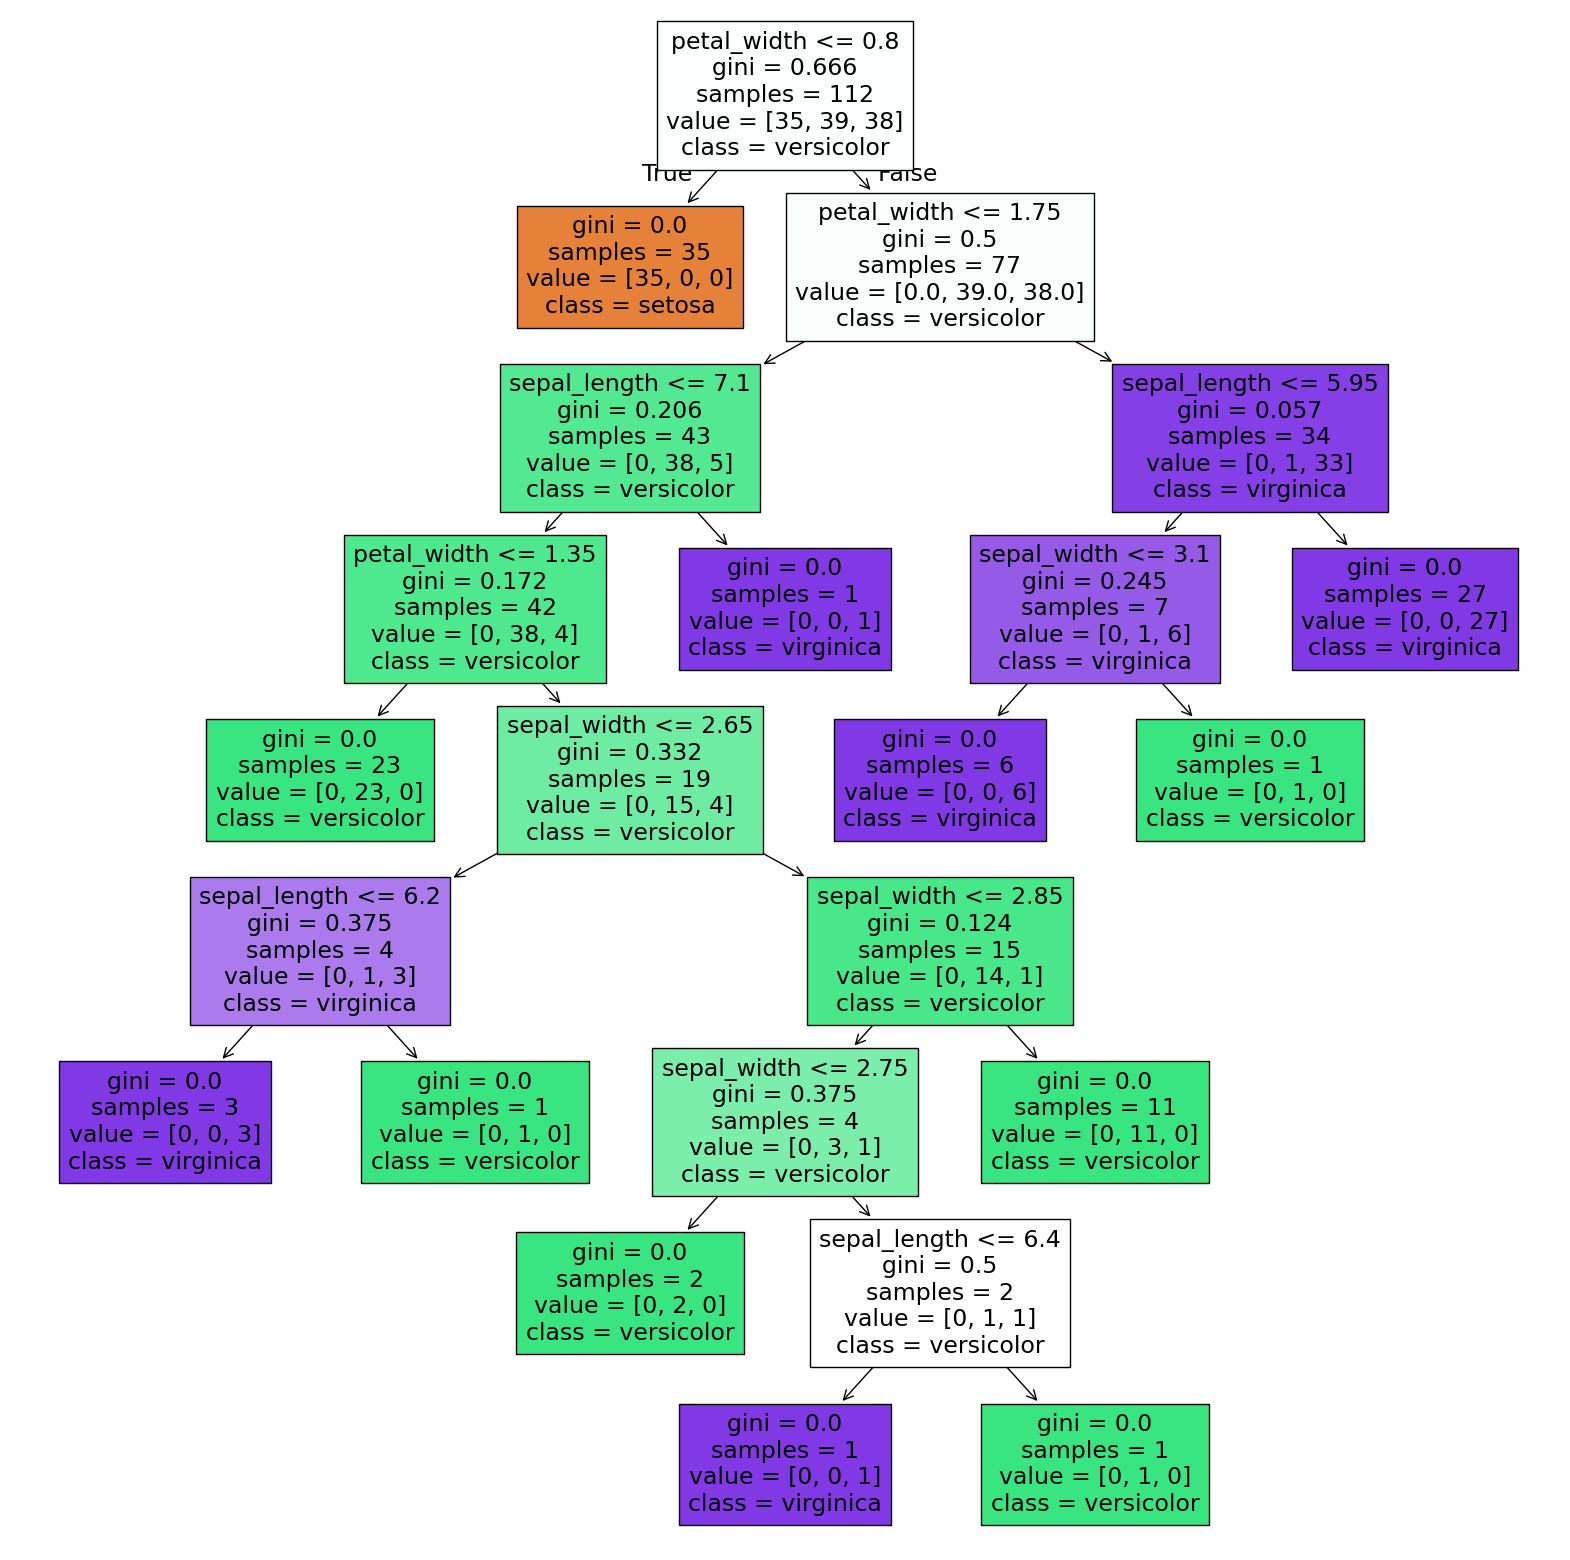

In [112]:
plt.figure(figsize=(20, 20))
tree2 = tree.plot_tree(dt, filled = True, feature_names = features, class_names = targets)
plt.show()

**Hyperparameter Optimization with Python**

In [119]:
from sklearn.model_selection import GridSearchCV

In [121]:
dt2 = DecisionTreeClassifier()

In [131]:
dt_param = {"criterion":["gini", "entropy"],
           "max_depth": np.arange(2, 14, 2),
            "max_features": ["auto", "sqrt", "log2"]
           }

In [133]:
dt_cv_modelt = GridSearchCV(estimator = dt2, param_grid = dt_param, cv = 10)

In [135]:
dt_cv_modelt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [137]:
dt_cv_modelt.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2'}

In [139]:
dt_tuned = DecisionTreeClassifier( criterion = 'gini',  max_depth = 6,  max_features = 'log2')

In [141]:
dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features='log2')

In [153]:
y_pred = dt_tuned.predict(X_test)

In [155]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.9736842105263158


In [157]:
from sklearn.model_selection import cross_val_score

cross_check = cross_val_score(estimator = dt_tuned, X = X_train, y = y_train, cv = 10)
cross_check.mean()

0.8651515151515152

In [159]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]
